In [1]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

Import all the necessary library in the cell below

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.optimize import fsolve
from scipy.integrate import quad
from scipy.integrate import odeint 




**Problem 1**

1- Load the titanic dataset from the seaborn package.

In [3]:
data1=sns.load_dataset('titanic')
data1

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


2- how many columns in this dataset?

In [4]:
data1.columns.size

15

3- list the names of all columns and describe the datatype of each column? 

In [5]:
data1.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

4- Count the number of missing values in each column

In [6]:
data1.isna().sum()


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

5- Clean the dataset by removing every record that contains a missing value? 

In [7]:
data1.dropna(inplace=True)
data1

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


6 - Compute the average age of females and males who survived? 

6 - Count how many people survived by age and sex. Display the result as DataFrame. 

In [9]:
data1=titanic.groupby(by=['survived','age','sex']).count()

NameError: name 'titanic' is not defined

7- Build a logistic regression model using the pclass, age, parch, sex, and fare columns as explanatory variables and the survived column as response variable

8- Measure its performance using accuracy score and display the confusion matrix. 

9- Interpret the result

**Problem 2**

Let assume we have the one dimensional process model
\begin{equation}
x_i = \alpha x_{i-1}+\delta_i, \text{ with }\delta_i\thicksim \mathcal{N}(0,q^2),\;\; i = 1,\cdots,N ,
\end{equation}
and $x_0\thicksim \mathcal{N}(\mu,r^2)$. Assume the data model is 

\begin{equation}
y_i = h_i x_{i}+\epsilon_i, \text{ with }\epsilon_i\thicksim \mathcal{N}(0,s^2),\;\; i = 1,\cdots,N ,
\end{equation}
where
$$
h_i =\begin{cases}
 1, \;\;& i=&1,\cdots,N_1\\
0.1, & i=&N_1+1,\cdots, N_2\\
0.9, & i=&N_2+1,\cdots,N
\end{cases}.
$$
Note that $N_1<N_2<N$.

1- Write Python function called **Process** that takes $\alpha, N, q, \mu, r$ and return the array $x$ of the $x_i, i=0,\cdots,N$.

In [10]:
def Process(alp, N, q,r,mu):
    x = np.empty(N+1)
    x[0] = np.random.normal(0,1)
    for i in range(1,N+1):
        x[i] = alp*x[i-1]  + np.random.normal(0,q)
    return x 

2- Write Python function called **Data** that takes array $x$ of the $x_i$, $s, N_1, N_2, N$ and return the array $y$ of $y_i,i=1,\cdots,N$

In [25]:
def Data(x,s,N1,N2,N):
    N=len(x)-1
    #for i in range(1,0.1,0.9):
    y = h* x[1:] + np.random.normal(0, s,N) 
    return y

3- Write a program to plot the data on the same graph as the process model, for \begin{equation}
r = 0.1, q=0.4, s=0.9, \mu = 0.01, h= 1, \alpha = 0.8,N = 50,  N_1 = 20,  N_2 = 30
\end{equation}

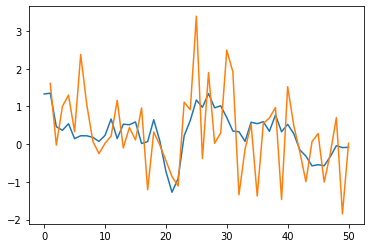

In [26]:
r=0.1
h=1
alp=0.8
N=50
N1=20
N2=30
q=0.4
s=0.9
mu=0.01

np.random.seed(10)
#x=Process(a,N,q)
x=Process(alp, N, q,r,mu)
#y=Data(x,s,h)
y=Data(x,s,N1,N2,N)
plt.plot(np.arange(0,N+1),x)
plt.plot(np.arange(1,N+1),y)
plt.show()

4- Use the general formulas given for the Kalman filter to find the one dimensional formulas for

\begin{equation}
\mu_{1\mid 0}, \sigma_{1\mid 0}, k_1, \mu_{1\mid 1},\sigma_{1\mid 1},
\end{equation}
in term of $\alpha, q,r,s,\mu$ and $y_1$ (write the answer as markdown)

5- Using the general formulas given for the Kalman filter, write Python program to calculate
\begin{equation}
\mu_{i\mid i-1}, \sigma_{i\mid i-1}, k_i, \mu_{i\mid i},\sigma_{i\mid i},
\end{equation}
for $i=1,\cdots, N$. Be sure to
initialize the loop over $i$. Hint: I suggest using $\text{mu\_old}[i]$ for $\mu_{i\mid i-1}$, $\text{sigma\_old}[i]$ for $\sigma_{i\mid i-1}$, $\text{mu\_new}[i]$ for $\mu_{i\mid i}$, $\text{sigma\_new}[i]$ for $\sigma_{i\mid i}$

In [ ]:
r=0.1
h=np.array([1,0.1,0.9])
alp=0.8
N=50
N1=20
N2=30
q=0.4
s=0.9
mu=0.01
y=Data(x,s,h)
mu_old = np.empty((N))
sigma_old = np.empty((N))
k = np.empty((N))
mu_new = np.empty((N))
sigma_new = np.empty((N))
mu_old[0] = 0
sigma_old[0] = q + alp**2 
k[0] = sigma_old[0]*h/(h**2*sigma_old[0] + r)
mu_new[0] = k[0]*y[0]
sigma_new[0] = (1 - (h*k[0])*sigma_old[0])
for i in range(1, N):
    mu_old[i] = alp*mu_new[i-1]
    sigma_old[i] = q + alp * sigma_new[i-1]*alp
    k[i] = sigma_old[i-1]*h*(h**2*sigma_old[i]+r)**-1
    mu_new[i]=mu_old[i]+k[i]*(y[i]-h*mu_old[i])
    sigma_new[i]=(1-k[i]*h)*sigma_old[i]
print(mu_old, sigma_old, k, mu_new, sigma_new)    
    

6- Write a Python program to plot the states $x_i$ and data $y_i$ together with the filtered and forecasted estimates on the same graph.

In [ ]:
plt.plot(np.arange(0,N+1),x)
plt.plot(np.arange(1,N+1),y)
plt.plot(np.arange(1,N+1),mu_new)
plt.plot(np.arange(1,N+1),sigma_new)
plt.plot(np.arange(1,N+1),k)
plt.plot(np.arange(1,N+1),mu_old)
plt.plot(np.arange(1,N+1),sigma_old)
plt.show()

**Problem 3**

1- Let $\{ x_k\}$ be a partition of $[a,b]$ such that $a=x_1<\cdots<x_{N-1}<x_N=b$ and $H$ be the length of the $k$-th subinterval ($H = x_k - x_{k-1}$),
then we have 
$$\int_a^bf(x)dx \approx \sum_{k=2}^N \frac{f(x_{k-1})+f(x_k)}{2}H = Z$$


Write a function named <b>Trap</b> that takes $a,b,N, f$ as inputs and return Z. Here, ``N = 50`` is the default value.

In [28]:
def Trap(a,b,f,N=50):
    H=(b-a)/N
    x=np.linspace(a,b,N+1)
    Z=0
    for k in range(2,N+1):
        Z=Z+H*(f(x[k-1])+f(x[k]))/2
    return Z

2- Let $m_k$  be the midpoint of the subinterval $[x_k,x_{k+1}]$ for all $k=1,\cdots,N-1$, we have 

$$\int_a^bf(x)dx \approx \sum_{m_k} f(m_{k})H = W$$

Write a function named <b>Mid</b> that takes $a,b,N, f$ as inputs and return W. Here, ``N = 50`` is the default value.

In [30]:
def Mid(a,b,f,N=50):
    H=(b-a)/N
    x=np.linspace(a,b,51)
    W=0
    for i in range(1,51):
        W=W+H*f(m[k])
    return W

3- Using **Trap, Mid** and python inbuilt function **quad**, compute and display the integral 

$$A = \int_0^{\sqrt{\ln(2)}}xe^{x^2}dx$$

In [59]:
import numpy as np
from scipy.integrate import quad

g=lambda x: x*np.exp(x**2)
A=quad(g,0,sqrt(np.log(2)))[0]
print("A=",Trap(0,sqrt(np.log(2),g))


SyntaxError: unexpected EOF while parsing (1289186343.py, line 6)

4- After computing the exact value of $A$, write a Python program that searches for the minimun values $N_{Trap}, N_{Mid}$ less than 10000 such that **Trap, Mid**, respectively, give a better approximation of $A$ then **odeint**.  If any the value  $ N_{Trap}, N_{Mid}$ doesn't exist your program should print the string **No $N_{Trap}$ found** or **No $N_{Mid}$ found**, respectively.

**Problem 4**

Let $\{ t_k\}$ be a partition of $[a,b]$ such that $a=t_0<t_2<\cdots<t_{N}=b$ and $H$ be the constant length of the $k$-th subinterval ($H = t_k - t_{k-1}$). Let us consider initial value problem

\begin{equation}\label{eul2}
  \begin{cases}
    \dfrac{dz}{dt} = f(z,t),      & \quad \text{on } [a, b]\\\\
    z(a) = c,
  \end{cases}
\end{equation}
where $z,f,c\in R^M$ i.e. $z = [x_1, x_2,\cdots, x_{M}]$, $c = [x_1(a), x_2(a),\cdots, x_{M}(a)]$ and $f = [f_1, f_2,\cdots, f_{M}]$. Note that \eqref{eul2} is a the general form of system of ODEs. 

Let $t, z_k,Z$ defined as follows $$t=[t_0,t_1,\cdots,t_{N-1},t_{N}],\quad z_k = [x_1(t_k), x_2(t_k),\cdots, x_{M}(t_k)], \quad
Z =\begin{pmatrix}
x_1(t_0)& x_2(t_0)&\cdots& x_{M}(t_0)\\
x_1(t_1)& x_2(t_1)&\cdots& x_{M}(t_1)\\
x_1(t_2)& x_2(t_2)&\cdots& x_{M}(t_2)\\
\vdots& \vdots&\ddots& \vdots\\
x_1(t_{N})& x_2(t_{N})&\cdots& x_{M}(t_{N})
\end{pmatrix}
$$

1. Write a python function <b> EulerOdeSys </b> that takes $f,c,t$ and return the solution $Z$ of the initial value problem \eqref{eul2} using Euler method i.e.
$$ z_{k+1} = z_k + Hf(z_k,t_k) $$


In [34]:
def EulerOdeSys(f,c,t):
    N=len(t)
    H=t[1]-t[0]
    M=len(f)
    Z=np.zeros((N,M))
    Z[0,:]=c
    
    for j in range(M):
        f=f[j]
        for k in range(N-1):
            Z[k+1,j]= Z[k,j]+H*f(Z[k,j],t[k])       
    return Z


2. Write a python function <b> RalstonOdeSys </b> that takes $f,c,t$ and return the solution $Z$ of the initial value problem (1) using the Ralston method i.e.

\begin{equation}
\begin{cases}
k_1 = f(z_k,t_k),\\\\
k_2 = f(z_k+\dfrac{2}{3}Hk_1, t_k + \dfrac{2}{3}H),\\\\
z_{k+1} = z_k + H(\dfrac{1}{4}k_1+\dfrac{3}{4}k_2)
\end{cases}
\end{equation}


In [36]:
def RK4OdeSys(f,c,t):
    N=len(t)
    H=t[1]-t[0]
    M=len(f)
    Z=np.zeros((N,M))
    Z[0,:]=c
    for j in range(M):
        g=f[j]
        for i in range(N-1):
            k1=f(Z[k,j],t[i])
            k2=g(Z[k,j]+H*k1*2/3,t[k]+H*2/3)
            Z[k+1,j]= Z[k,j]+H*(1/4*k1+3/4*k2) 
    return Z

**Problem 5**

Let $\{ x_k\}$ be a partition of $[a,b]$ such that $a=x_0<\cdots<x_{N-1}<x_{N}=b$ and $H$ be the constant length of the $k$-th subinterval ($H = x_k - x_{k-1}$). Let consider the second-order differential equation

\begin{equation}
  \begin{cases}
   \dfrac{d^2 y}{dx^2} + \dfrac{d y}{dx}-6y = 0 \qquad\forall x\in [a,b]\\\\
\dfrac{d y}{dx}(a)=0 , y(a) = 1
  \end{cases}
\end{equation}

Let $\{ y_k\}$ be the approximate solution i.e.  $y_k\approx g(x_k)=g_k$ where $g(x) = \dfrac{3}{5}e^{2x}+ \dfrac{2}{5}e^{-3x}$ is the exact solution. Let us denote $e_k = \mid g_k - y_k\mid$

1- Using the Python in-built function **odeint**, write a python function <b> SODE </b> that takes $a,b,N$ (with $N= 100$ as default value) and return array of all $x_k$, $y_k$, $g_k$ and $e_k$.


In [46]:
def  SODE(a,b,N=100):
    x = np.linspace(a, b, N+1)
    y = odeint(SODE, U0, x)[:,0]
    return x, y


ValueError: operands could not be broadcast together with shapes (50,) (51,) 

2- Using **odeint**, solve the second-order differential equation for $a = 0, b = 2$ and use subplot to plot side by side
- $y_k$ and $g_k$ vs $x_k$
- $e_k$ vs $x_k$

In [62]:
def model(U, x):
    y, z = U 
    dy_dx = z
    dz_dx = 6*y-z
    return np.array([dy_dx, dz_dx])

U0 = [1,0]
a=0
b=2

g = lambda x: 2*np.exp(3*x) - np.exp(-2*x) + 1

plt.plot(x, abs(y - g(x)))
plt.xlabel("x")
plt.ylabel("|y - g(x)|")
plt.plot(x,abs(y - g(x))
plt.show()


SyntaxError: invalid syntax (1908838110.py, line 17)

3- Using <b> RalstonOdeSys </b>, solve the second-order differential equation for $a = 0, b = 2$ and use subplot to plot side by side
- $y_k$ and $g_k$ vs $x_k$
- $e_k$ vs $x_k$

In [49]:

def RalstonOdesys(U, x):
    y, z = U
    dy_dx = z
    dz_dx = 6*y-z
    return np.array([dy_dx, dz_dx])

U0 = [1, 0]

a, b = 0, 2

x, y = RalstonOdesys(a, b, U0, SODE)

plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

TypeError: RalstonOdesys() takes 2 positional arguments but 4 were given

4- Using <b> EulerOdeSys </b>, solve the second-order differential equation for $a = 0, b = 2$ and use subplot to plot side by side
- $y_k$ and $g_k$ vs $x_k$
- $e_k$ vs $x_k$

In [ ]:
def EulerOdesys():
    

5- The L2 error, $L2Er$ between the exact and the approximate solution given by

$$L2Er = \sum_0^N H(y_k - g_k)^2$$


Write a function called **L2_error** that takes $a,b,H$ and return the L2 error $g_k$ and the approximate solution $y_k$ obtained using **SODE**, **RalstonOdeSys** and **EulerOdeSys**.

In [57]:
def L2_error(a, b, H):
    x, y = SODE(a, b, U0, model, H)
    L2Er = sum(H * (y - g(x))**2)
    
    return L2Er

6- Let us denote $L2Er_j$ the output of **L2_error** for a given argument $a,b,H_j$. Using **SODE**, **RalstonOdeSys** and **EulerOdeSys**, compute the array of $L2Er_j$ for $a = 0, b=2$ and $H_j$ in an array $L =[ 10^{-1}, 10^{-2}, 10^{-3}, 10^{-4}]$.

In [58]:
a, b = 0, 2
Hj = np.array([10**-i for i in range(1,5)])
L2Erj = np.array([L2_error(a, b, H) for H in Hj])

TypeError: SODE() takes from 2 to 3 positional arguments but 5 were given

7- For each method **SODE**, **RalstonOdeSys** and **EulerOdeSys**, plot in the same graph $log(L2Er_j)$ vs $log(H_j)$.

In [63]:
plt.plot(np.log(Hj), np.log(L2Erj)
plt.xlabel("H")
plt.ylabel("L2 Error")
plt.show()

SyntaxError: invalid syntax (1107189094.py, line 2)

By assuming that $log(H_j)$ is the explanatory variable of $log(L2Er_j)$, complete the simple linear regression in the case of  **RalstonOdeSys**, **EulerOdeSys** and display the regression coeficient.

Note: Use the whole data to train your linear model.

**Problem 6**

1-The cost of admission to the world cup 2022 game is
- 320 USD for 3 children, 1 female  and 1 male 
- 600 USD  for 4 females and 2 males 
- 600 USD  for 5 children, 2 females and 2 males 

Transform the problem into a system of equation (as markdown in the cell below)

\#2pt
\begin{equation}
\begin{cases}
    3c + f+m = 320 \\
    4f + 2m = 600 \\
    5c + 2f + 2m = 600,
\end{cases}
\end{equation}
where $c$ is for children, $f$ for female and $m$ for male.

2- Write a Python code to compute and display how much is the admission for each child, female and male?

In [52]:
A = np.array([[3,1,1], [4,2,0], [5,2,2]])
b = np.array([[320], [600], [600]])
z = np.linalg.solve(A,b)

print("z =", z)

z = [[ 40.]
 [220.]
 [-20.]]


3- Using the Python in-built function fsolve with unitial guess $x=1, y=1$, write a Python code to solve the following system

\begin{equation}
\begin{cases}
    e^{x^2} + x = sin(y)\\
    2e^x + cos(y) = 3
\end{cases}
\end{equation}


In [53]:
def myfunction(z):
    x, y = z
    
    F = np.empty((2))
    F[0] = np.exp(x**2)+x + np.sin(y)
    F[1] = 2*np.exp(x) + np.cos(y) - 2
    
    return F

z0 = [1,1]
z = fsolve(myfunction, z0)

print("z =", z)

z = [-0.37939153 -0.88738139]
